# Run methods and plot runtime results

## run_methods.py

```python
import click
import numpy as np
import pandas as pd
import anndata
import scvi
import time
import scanpy as sc


def train_scvi(adata):

    m = scvi.model.SCVI(adata)
    
    if 0.1 * adata.n_obs < 20000:
        train_size = 0.9
    else:
        train_size = 1-(20000/adata.n_obs)
    print(train_size)
    start = time.time()
    m.train(early_stopping=True,
            train_size=train_size,
            early_stopping_patience=45,
            max_epochs=10000, 
            batch_size=1024, 
            limit_train_batches=20,
           )
    end = time.time()

    is_backed = adata.isbacked
    if is_backed:
        is_backed = 'backed'
    else:
        is_backed = 'unbacked'

    save_fn = '{}_{}_{}_'.format(adata.n_obs, adata.n_vars, is_backed) + 'scvi_model'
    m.save(save_fn, overwrite=True)
    
    time_fn = '{}_{}_{}_'.format(adata.n_obs, adata.n_vars, is_backed) + 'time_scvi'
    print('saving time to ', time_fn)
    np.save(time_fn, end-start)

    
def run_bbknn(adata):
    bbknn_covs = ["cell_source", "donor"]
    
    if 'batch' in adata.obs.keys():
        del adata.obs['batch']
    adata.obs['batch'] = ''
    for cov in bbknn_covs:
        adata.obs['batch'] = adata.obs['batch'].astype(str) + adata.obs[cov].astype(str)
        
    covariates = ["percent_mito", "percent_ribo",
                    'rand_noise_0',
                    'rand_noise_1',
                    'rand_noise_2',
                    'rand_noise_3',
                    'rand_noise_4',
                    'rand_noise_5',
                    'rand_noise_6',
                    'rand_noise_7']
    
    start = time.time()
    sc.pp.regress_out(adata, covariates)
    sc.tl.pca(adata)
    sc.external.pp.bbknn(adata)
    end = time.time()
    
    is_backed = adata.isbacked
    if is_backed:
        is_backed = 'backed'
    else:
        is_backed = 'unbacked'
   
    time_fn = '{}_{}_{}_'.format(adata.n_obs, adata.n_vars, is_backed) + 'time_bbknn'
    print('saving time to ', time_fn)
    np.save(time_fn, end-start)

def run_regress(adata):
    covariates = ["percent_mito", "percent_ribo",
                    'rand_noise_0',
                    'rand_noise_1',
                    'rand_noise_2',
                    'rand_noise_3',
                    'rand_noise_4',
                    'rand_noise_5',
                    'rand_noise_6',
                    'rand_noise_7']
    start = time.time()
    sc.pp.regress_out(adata, covariates)
    end = time.time()
    
    is_backed = adata.isbacked
    if is_backed:
        is_backed = 'backed'
    else:
        is_backed = 'unbacked'
        
    time_fn = '{}_{}_{}_'.format(adata.n_obs, adata.n_vars, is_backed) + 'time_regress'
    print('saving time to ', time_fn)
    np.save(time_fn, end-start)

def run_harmony(adata):
    covariates = ["percent_mito", "percent_ribo",
                    'rand_noise_0',
                    'rand_noise_1',
                    'rand_noise_2',
                    'rand_noise_3',
                    'rand_noise_4',
                    'rand_noise_5',
                    'rand_noise_6',
                    'rand_noise_7']
    harmony_covs = ["cell_source", "donor"]
    
    start = time.time()
    sc.pp.regress_out(adata, covariates)
    sc.tl.pca(adata)
    sc.external.pp.harmony_integrate(adata, harmony_covs)
    end = time.time()
    
    is_backed = adata.isbacked
    if is_backed:
        is_backed = 'backed'
    else:
        is_backed = 'unbacked'
        
    time_fn = '{}_{}_{}_'.format(adata.n_obs, adata.n_vars, is_backed) + 'time_harmony'
    print('saving time to ', time_fn)
    np.save(time_fn, end-start)
    
@click.command()
@click.option('--adata_fn')
@click.option('--is_backed', is_flag = True)
@click.option('--method')
def run_methods(adata_fn, is_backed, method):
    if is_backed:
        print('loading in backed mode')
        adata = anndata.read(adata_fn, 'r+')
    else:
        adata = anndata.read(adata_fn)

    if method == 'scvi':
        train_scvi(adata)
    elif method == 'bbknn':
        run_bbknn(adata)
    elif method == 'harmony':
        run_harmony(adata)
    elif method == 'regress':
        run_regress(adata)
        
if __name__ == '__main__':
    run_methods()

```

## Comannds used to run each method
```bash
mprof run python run_methods.py --adata_fn 10_5000_4000.h5ad --method scvi
mprof run python run_methods.py --adata_fn 10_10000_4000.h5ad --method scvi
mprof run python run_methods.py --adata_fn 10_20000_4000.h5ad --method scvi
mprof run python run_methods.py --adata_fn 10_40000_4000.h5ad --method scvi
mprof run python run_methods.py --adata_fn 10_80000_4000.h5ad --method scvi
mprof run python run_methods.py --adata_fn 10_160000_4000.h5ad --method scvi
mprof run python run_methods.py --adata_fn 10_320000_4000.h5ad --method scvi
mprof run python run_methods.py --adata_fn 10_486134_4000.h5ad --method scvi

mprof run python run_methods.py --adata_fn 10_5000_4000.h5ad --method bbknn
mprof run python run_methods.py --adata_fn 10_10000_4000.h5ad --method bbknn
mprof run python run_methods.py --adata_fn 10_20000_4000.h5ad --method bbknn
mprof run python run_methods.py --adata_fn 10_40000_4000.h5ad --method bbknn
mprof run python run_methods.py --adata_fn 10_80000_4000.h5ad --method bbknn
mprof run python run_methods.py --adata_fn 10_160000_4000.h5ad --method bbknn
mprof run python run_methods.py --adata_fn 10_320000_4000.h5ad --method bbknn
mprof run python run_methods.py --adata_fn 10_486134_4000.h5ad --method bbknn

mprof run python run_methods.py --adata_fn 10_5000_4000.h5ad --method harmony
mprof run python run_methods.py --adata_fn 10_10000_4000.h5ad --method harmony
mprof run python run_methods.py --adata_fn 10_20000_4000.h5ad --method harmony
mprof run python run_methods.py --adata_fn 10_40000_4000.h5ad --method harmony
mprof run python run_methods.py --adata_fn 10_80000_4000.h5ad --method harmony
mprof run python run_methods.py --adata_fn 10_160000_4000.h5ad --method harmony
mprof run python run_methods.py --adata_fn 10_320000_4000.h5ad --method harmony
mprof run python run_methods.py --adata_fn 10_486134_4000.h5ad --method harmony

mprof run python run_methods.py --adata_fn 10_5000_4000.h5ad --method regress
mprof run python run_methods.py --adata_fn 10_10000_4000.h5ad --method regress
mprof run python run_methods.py --adata_fn 10_20000_4000.h5ad --method regress
mprof run python run_methods.py --adata_fn 10_40000_4000.h5ad --method regress
mprof run python run_methods.py --adata_fn 10_80000_4000.h5ad --method regress
mprof run python run_methods.py --adata_fn 10_160000_4000.h5ad --method regress
mprof run python run_methods.py --adata_fn 10_320000_4000.h5ad --method regress
mprof run python run_methods.py --adata_fn 10_486134_4000.h5ad --method regress
```

## Plot Results

In [43]:
import pandas as pd
import anndata
import numpy as np
import os
import matplotlib.pyplot as plt

In [44]:
def get_dat_files(folder):
    fns = os.listdir(folder)
    return [os.path.join(folder,f) for f in fns if f.endswith('.dat')]

In [45]:
folder = './'
files = get_dat_files(folder)

In [46]:
for fn in files:
     with open(fn) as f:
        command = f.readline()
        print(fn, command)

./mprofile_20210423025232.dat CMDLINE python run_methods.py --adata_fn 10_5000_4000.h5ad --method harmony

./mprofile_20210423003455.dat CMDLINE python run_methods.py --adata_fn 10_160000_4000.h5ad --method scvi

./mprofile_20210423002024.dat CMDLINE python run_methods.py --adata_fn 10_5000_4000.h5ad --method scvi

./mprofile_20210423040705.dat CMDLINE python run_methods.py --adata_fn 10_486134_4000.h5ad --method harmony

./mprofile_20210423002203.dat CMDLINE python run_methods.py --adata_fn 10_20000_4000.h5ad --method scvi

./mprofile_20210423014227.dat CMDLINE python run_methods.py --adata_fn 10_320000_4000.h5ad --method bbknn

./mprofile_20210423051345.dat CMDLINE python run_methods.py --adata_fn 10_80000_4000.h5ad --method regress

./mprofile_20210423002744.dat CMDLINE python run_methods.py --adata_fn 10_80000_4000.h5ad --method scvi

./mprofile_20210423025556.dat CMDLINE python run_methods.py --adata_fn 10_40000_4000.h5ad --method harmony

./mprofile_20210423051104.dat CMDLINE pyt

In [47]:
full = pd.DataFrame(columns=['n_var', 'n_cov', 'n_obs', 'runtime', 'mem_mb', 'method'])

for i,fn in enumerate(files):
    with open(fn) as f:
        command = f.readline()
        print(command)
        backed_str = 'unbacked'
        if 'is_backed' in command:
            command = command.split(' ')[-4]
            method = 'scvi_backed'
            method_str = 'scvi'
            backed_str = 'backed'
        else:
            tmp = command.split(' ')
            command = tmp[-3]
            method = tmp[-1].strip()
            backed_str = 'unbacked'
            method_str = method
        
        meta = command.split('_')
        
        n_cov, n_obs, n_vars = meta[0], meta[1], meta[2]
        n_cov = float(n_cov)
        n_obs = float(n_obs)
        n_vars = float(n_vars.strip()[:-5])
        time_fn = '{}_{}_{}_time_{}.npy'.format(int(n_obs), int(n_vars), backed_str, method_str)
        time_fn = os.path.join(folder, time_fn)
        
        memory = []
        for line in f:
            memory.append(line.split(' ')[1])
        
        n_sec = float(np.load(time_fn))
        max_mem = np.max(np.array(memory).astype('float32'))
        full.loc[i] = [n_vars, n_cov, n_obs, n_sec, max_mem, method]
        

CMDLINE python run_methods.py --adata_fn 10_5000_4000.h5ad --method harmony

CMDLINE python run_methods.py --adata_fn 10_160000_4000.h5ad --method scvi

CMDLINE python run_methods.py --adata_fn 10_5000_4000.h5ad --method scvi

CMDLINE python run_methods.py --adata_fn 10_486134_4000.h5ad --method harmony

CMDLINE python run_methods.py --adata_fn 10_20000_4000.h5ad --method scvi

CMDLINE python run_methods.py --adata_fn 10_320000_4000.h5ad --method bbknn

CMDLINE python run_methods.py --adata_fn 10_80000_4000.h5ad --method regress

CMDLINE python run_methods.py --adata_fn 10_80000_4000.h5ad --method scvi

CMDLINE python run_methods.py --adata_fn 10_40000_4000.h5ad --method harmony

CMDLINE python run_methods.py --adata_fn 10_40000_4000.h5ad --method regress

CMDLINE python run_methods.py --adata_fn 10_5000_4000.h5ad --method regress

CMDLINE python run_methods.py --adata_fn 10_320000_4000.h5ad --method harmony

CMDLINE python run_methods.py --adata_fn 10_10000_4000.h5ad --method harmony


In [49]:
full['method'][full['method']=='scvi'] = 'scVI'
full['method'][full['method']=='bbknn'] = 'regress-bbknn'
full['method'][full['method']=='harmony'] = 'regress-harmony'


<ipython-input-49-a78897224658>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full['method'][full['method']=='scvi'] = 'scVI'
<ipython-input-49-a78897224658>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full['method'][full['method']=='bbknn'] = 'regress-bbknn'
<ipython-input-49-a78897224658>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full['method'][full['method']=='harmony'] = 'regress-harmony'


In [50]:
import seaborn as sns
# sc.settings._vector_friendly = True
# p9.theme_set(p9.theme_classic)
plt.rcParams["svg.fonttype"] = "none"
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["savefig.transparent"] = True
plt.rcParams["figure.figsize"] = (4, 4)

plt.rcParams["axes.titlesize"] = 15
plt.rcParams["axes.titleweight"] = 500
plt.rcParams["axes.titlepad"] = 8.0
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["axes.labelweight"] = 500
plt.rcParams["axes.linewidth"] = 1.2
plt.rcParams["axes.labelpad"] = 6.0
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False


plt.rcParams["font.size"] = 11
# plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Helvetica', "Computer Modern Sans Serif", "DejaVU Sans"]
plt.rcParams['font.weight'] = 500

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['xtick.minor.size'] = 1.375
plt.rcParams['xtick.major.size'] = 2.75
plt.rcParams['xtick.major.pad'] = 2
plt.rcParams['xtick.minor.pad'] = 2

plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['ytick.minor.size'] = 1.375
plt.rcParams['ytick.major.size'] = 2.75
plt.rcParams['ytick.major.pad'] = 2
plt.rcParams['ytick.minor.pad'] = 2

plt.rcParams["legend.fontsize"] = 12
plt.rcParams['legend.handlelength'] = 1.4
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['legend.scatterpoints'] = 3
plt.rcParams['legend.frameon'] = False

plt.rcParams['lines.linewidth'] = 1.7

DPI = 300

In [51]:
full['n_obs'] /= 1000

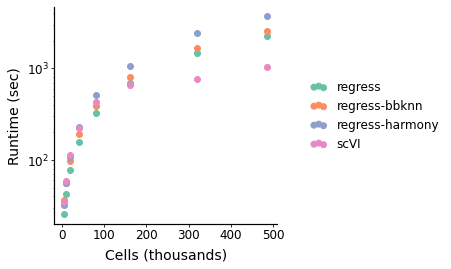

In [52]:
import itertools


fig, ax = plt.subplots()

group = np.unique(full['method'])
palette = itertools.cycle(sns.color_palette("Set2"))

for g in np.unique(group):
    tmp = full[full['method']==g]
    ax.scatter(tmp['n_obs'], tmp['runtime'], label=g, color=next(palette))

ax.set_xlabel('Cells (thousands)')
ax.set_ylabel('Runtime (sec)')
ax.set_yscale('log')
ax.set_title('Runtime with 4000 genes')
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
# plt.show()
plt.savefig('4000genes_runtime.pdf', bbox_inches='tight', dpi=300)